In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as pyplt
import seaborn as sns
pd.options.display.float_format = '{:.2f}'.format

In [2]:
previous_application = pd.read_csv("C:/Users/User/CSV-TXT-OTHER/previous_application.csv")
prevapprow = previous_application.shape[0]
prevappcol = previous_application.shape[1]
print("Previous application has " + str(prevapprow) + " rows and " + str(prevappcol) + " columns.")

Previous application has 1670214 rows and 37 columns.


In [3]:
bureau = pd.read_csv("C:/Users/User/CSV-TXT-OTHER/bureau.csv")
bureau = bureau.drop(columns = 'Unnamed: 0')
bureauapprow = bureau.shape[0]
bureauappcol = bureau.shape[1]
print("Bureau has " + str(bureauapprow) + " rows and " + str(bureauappcol) + " columns.")

Bureau has 1716428 rows and 17 columns.


In [4]:
merged1 = previous_application.merge(bureau, how = 'outer', on=['SK_ID_CURR', 'AMT_ANNUITY'])
mergeapprow = merged1.shape[0]
mergeappcol = merged1.shape[1]
print("Merged bureau and previous application file has " + str(mergeapprow) + " rows and " + str(mergeappcol) + " columns.")

Merged bureau and previous application file has 3966118 rows and 52 columns.


In [5]:
merged1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3966118 entries, 0 to 3966117
Data columns (total 52 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   SK_ID_PREV                   float64
 1   SK_ID_CURR                   int64  
 2   NAME_CONTRACT_TYPE           object 
 3   AMT_ANNUITY                  float64
 4   AMT_APPLICATION              float64
 5   AMT_CREDIT                   float64
 6   AMT_DOWN_PAYMENT             float64
 7   AMT_GOODS_PRICE              float64
 8   WEEKDAY_APPR_PROCESS_START   object 
 9   HOUR_APPR_PROCESS_START      float64
 10  FLAG_LAST_APPL_PER_CONTRACT  object 
 11  NFLAG_LAST_APPL_IN_DAY       float64
 12  RATE_DOWN_PAYMENT            float64
 13  RATE_INTEREST_PRIMARY        float64
 14  RATE_INTEREST_PRIVILEGED     float64
 15  NAME_CASH_LOAN_PURPOSE       object 
 16  NAME_CONTRACT_STATUS         object 
 17  DAYS_DECISION                float64
 18  NAME_PAYMENT_TYPE            object 
 19  

In [6]:
# Our testable variable will be inside of Credit Type -- Consumer Credit
merged1.CREDIT_TYPE.value_counts()

Consumer credit                                 1887730
Credit card                                      608412
Car loan                                          38901
Mortgage                                          23798
Microloan                                         19927
Loan for business development                      2854
Another type of loan                               1614
Unknown type of loan                                878
Loan for working capital replenishment              727
Cash loan (non-earmarked)                            71
Loan for the purchase of equipment                   33
Real estate loan                                     33
Loan for purchase of shares (margin lending)          4
Mobile operator loan                                  1
Interbank credit                                      1
Name: CREDIT_TYPE, dtype: int64

## Let's look through our SK_ID_CURR which shows us we may have a 1:many relationship

In [7]:
pd.options.display.max_rows=10000
merged1_idcurrbur=merged1.groupby("SK_ID_CURR").agg({'SK_ID_BUREAU': 'count'})
merged1_idcurrbur.rename(columns={merged1_idcurrbur.columns[0]: "bureau_acct_cnt" }, inplace = True)
merged1_idcurrbur.head(20)

,bureau_acct_cnt
SK_ID_CURR,
100001,7
100002,8
100003,4
100004,2
100005,3
100006,0
100007,1
100008,3
100009,18


## Get rid of the 0 instances

In [8]:
merged1_idcurrbur = merged1_idcurrbur[merged1_idcurrbur['bureau_acct_cnt'] != 0]
merged1_idcurrbur.head(20)

,bureau_acct_cnt
SK_ID_CURR,
100001,7
100002,8
100003,4
100004,2
100005,3
100007,1
100008,3
100009,18
100010,2


In [9]:
# Let's keep tabs on our frequency counts/iterations
merged2 = merged1.merge(merged1_idcurrbur, how = 'right', on= 'SK_ID_CURR')
merged2['freq']=merged2.groupby(by='SK_ID_CURR').cumcount()
merged2

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,bureau_acct_cnt,freq
0,1369693.00,100001,Consumer loans,3951.00,24835.50,23787.00,2520.00,24835.50,FRIDAY,13.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7,0
1,NaN,100001,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.00,112500.00,0.00,0.00,0.00,Consumer credit,-155.00,7,1
2,NaN,100001,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.00,279720.00,0.00,0.00,0.00,Consumer credit,-155.00,7,2
3,NaN,100001,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.00,91620.00,0.00,0.00,0.00,Consumer credit,-155.00,7,3
4,NaN,100001,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.00,85500.00,0.00,0.00,0.00,Consumer credit,-155.00,7,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3765424,NaN,456255,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.00,27472.50,0.00,0.00,0.00,Consumer credit,-700.00,11,14
3765425,NaN,456255,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.00,90000.00,61060.50,NaN,0.00,Credit card,-11.00,11,15
3765426,NaN,456255,NaN,3244.50,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.00,22995.00,0.00,NaN,0.00,Consumer credit,-953.00,11,16
3765427,NaN,456255,NaN,3244.50,NaN,NaN,NaN,NaN,NaN,NaN,...,15439.91,0.00,450000.00,191005.47,0.00,0.00,Consumer credit,-55.00,11,17


In [10]:
# Change format to years to get a better estimate
merged1['Years_Credit'] = merged1['DAYS_CREDIT']/365
merged1['MONTH_OVERDUE'] = merged1['CREDIT_DAY_OVERDUE']/12
merged1['YEAR_OVERDUE'] = merged1['CREDIT_DAY_OVERDUE']/365
merged2['Years_Credit'] = merged2['DAYS_CREDIT']/365
merged2['MONTH_OVERDUE'] = merged2['CREDIT_DAY_OVERDUE']/12
merged2['YEAR_OVERDUE'] = merged1['CREDIT_DAY_OVERDUE']/365

## 1 to many current ID to Bureau ID relationship. There are multiple entries for each customer. Let's look at the date to order our relationship

In [11]:
ORIG_DAYS_CREDIT=pd.DataFrame(merged2.DAYS_CREDIT.describe())
ORIG_DAYS_CREDIT

,DAYS_CREDIT
count,2584984.00
mean,-1132.47
std,794.11
min,-2922.00
25%,-1650.00
50%,-972.00
75%,-466.00
max,0.00


In [12]:
YEAR_CREDIT=pd.DataFrame(merged2.Years_Credit.describe())
YEAR_CREDIT

,Years_Credit
count,2584984.00
mean,-3.10
std,2.18
min,-8.01
25%,-4.52
50%,-2.66
75%,-1.28
max,0.00


In [13]:
# Let's keep track of mean to see if it changes significantlly
merged1_idcurrbur_mean = merged1_idcurrbur.agg({'bureau_acct_cnt': 'mean'})
print(merged1_idcurrbur_mean)
merged1_idcurrbur.describe([.1,.2,.3,.4,.5,.6,.7,.8,.9])

bureau_acct_cnt   8.45
dtype: float64


,bureau_acct_cnt
count,305811.00
mean,8.45
std,13.19
min,1.00
10%,1.00
20%,2.00
30%,3.00
40%,4.00
50%,5.00
60%,6.00


## Sorting by days gives us a good subset to compare data to see repeated instances

In [14]:
merged2.sort_values(by =['SK_ID_CURR','DAYS_CREDIT'], ascending=[True,False]) 

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,bureau_acct_cnt,freq,Years_Credit,MONTH_OVERDUE,YEAR_OVERDUE
6,NaN,100001,NaN,10822.50,NaN,NaN,NaN,NaN,NaN,NaN,...,373239.00,0.00,0.00,Consumer credit,-16.00,7,6,-0.13,0.00,NaN
7,NaN,100001,NaN,9364.50,NaN,NaN,NaN,NaN,NaN,NaN,...,110281.50,NaN,0.00,Consumer credit,-10.00,7,7,-0.88,0.00,0.00
5,NaN,100001,NaN,4630.50,NaN,NaN,NaN,NaN,NaN,NaN,...,113166.00,0.00,0.00,Consumer credit,-6.00,7,5,-1.53,0.00,NaN
1,NaN,100001,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,...,0.00,0.00,0.00,Consumer credit,-155.00,7,1,-2.35,0.00,NaN
3,NaN,100001,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,...,0.00,0.00,0.00,Consumer credit,-155.00,7,3,-2.41,0.00,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3765413,2073384.00,456255,Cash loans,16400.61,229500.00,254340.00,NaN,229500.00,THURSDAY,12.00,...,NaN,NaN,NaN,NaN,NaN,11,3,NaN,NaN,0.00
3765414,1708056.00,456255,Revolving loans,2250.00,45000.00,45000.00,NaN,45000.00,SUNDAY,14.00,...,NaN,NaN,NaN,NaN,NaN,11,4,NaN,NaN,0.00
3765415,1296007.00,456255,Cash loans,30737.65,765000.00,1067940.00,NaN,765000.00,FRIDAY,14.00,...,NaN,NaN,NaN,NaN,NaN,11,5,NaN,NaN,0.00
3765416,2631384.00,456255,Cash loans,54022.14,1170000.00,1271929.50,NaN,1170000.00,FRIDAY,14.00,...,NaN,NaN,NaN,NaN,NaN,11,6,NaN,NaN,0.00


In [15]:
merged2.CREDIT_ACTIVE.value_counts()

Closed      1655473
Active       919812
Sold           9651
Bad debt         48
Name: CREDIT_ACTIVE, dtype: int64

## Just subset Credit Active == Active to see if our mean goes down

In [16]:
merged_sort=merged2.loc[(merged2['CREDIT_ACTIVE']=="Active")].sort_values(by =['SK_ID_CURR','DAYS_CREDIT'], ascending=[True,False]) 
merged_idcurrbur=merged_sort.groupby("SK_ID_CURR").agg({'SK_ID_BUREAU': 'count'})
merged_idcurrbur.rename(columns={merged_idcurrbur.columns[0]: "bureau_acct_cnt" }, inplace = True)
merged_idcurrbur

,bureau_acct_cnt
SK_ID_CURR,
100001,3
100002,2
100003,1
100005,2
100008,1
...,...
456247,3
456249,2
456250,2


In [17]:
merged_idcurrbur_mean = merged_idcurrbur.agg({'bureau_acct_cnt': 'mean'})
merged_idcurrbur_mean

bureau_acct_cnt   3.65
dtype: float64

In [18]:
merged_idcurrbur.describe(percentiles={.1,.2,.3,.4,.5,.6,.7,.8,.9})

,bureau_acct_cnt
count,251815.00
mean,3.65
std,5.20
min,1.00
10%,1.00
20%,1.00
30%,2.00
40%,2.00
50%,2.00
60%,3.00


## We see the mean coming down when we just subset with credit active

## We are gonna subset the first three occurrences and put them in panels

In [19]:
# Keep the first occurence by dropping all duplicates
merged_panelbase = merged_sort.drop_duplicates('SK_ID_CURR',keep="first")
merged_panelbase.head(5)

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,bureau_acct_cnt,freq,Years_Credit,MONTH_OVERDUE,YEAR_OVERDUE
6,NaN,100001,NaN,10822.50,NaN,NaN,NaN,NaN,NaN,NaN,...,373239.00,0.00,0.00,Consumer credit,-16.00,7,6,-0.13,0.00,NaN
13,NaN,100002,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,...,0.00,31988.56,0.00,Credit card,-24.00,8,5,-0.28,0.00,0.00
23,NaN,100003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.00,810000.00,0.00,Credit card,-43.00,4,6,-1.66,0.00,0.00
31,NaN,100005,NaN,4261.50,NaN,NaN,NaN,NaN,NaN,NaN,...,25321.50,0.00,0.00,Consumer credit,-31.00,3,4,-0.17,0.00,0.00
41,1757431.00,100008,Cash loans,NaN,0.00,0.00,NaN,NaN,FRIDAY,18.00,...,240057.00,0.00,0.00,Consumer credit,-16.00,3,2,-0.21,0.00,0.00


In [20]:
merged_panelbase = merged_panelbase.add_suffix('_1')
merged_panelbase

,SK_ID_PREV_1,SK_ID_CURR_1,NAME_CONTRACT_TYPE_1,AMT_ANNUITY_1,AMT_APPLICATION_1,AMT_CREDIT_1,AMT_DOWN_PAYMENT_1,AMT_GOODS_PRICE_1,WEEKDAY_APPR_PROCESS_START_1,HOUR_APPR_PROCESS_START_1,...,AMT_CREDIT_SUM_DEBT_1,AMT_CREDIT_SUM_LIMIT_1,AMT_CREDIT_SUM_OVERDUE_1,CREDIT_TYPE_1,DAYS_CREDIT_UPDATE_1,bureau_acct_cnt_1,freq_1,Years_Credit_1,MONTH_OVERDUE_1,YEAR_OVERDUE_1
6,NaN,100001,NaN,10822.50,NaN,NaN,NaN,NaN,NaN,NaN,...,373239.00,0.00,0.00,Consumer credit,-16.00,7,6,-0.13,0.00,NaN
13,NaN,100002,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,...,0.00,31988.56,0.00,Credit card,-24.00,8,5,-0.28,0.00,0.00
23,NaN,100003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.00,810000.00,0.00,Credit card,-43.00,4,6,-1.66,0.00,0.00
31,NaN,100005,NaN,4261.50,NaN,NaN,NaN,NaN,NaN,NaN,...,25321.50,0.00,0.00,Consumer credit,-31.00,3,4,-0.17,0.00,0.00
41,1757431.00,100008,Cash loans,NaN,0.00,0.00,NaN,NaN,FRIDAY,18.00,...,240057.00,0.00,0.00,Consumer credit,-16.00,3,2,-0.21,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3765370,NaN,456247,NaN,4329.00,NaN,NaN,NaN,NaN,NaN,NaN,...,0.00,0.00,0.00,Consumer credit,-32.00,11,10,-0.85,0.00,0.00
3765387,NaN,456249,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,163071.00,NaN,0.00,Credit card,-12.00,13,12,-1.32,0.00,0.00
3765399,NaN,456250,NaN,51799.50,NaN,NaN,NaN,NaN,NaN,NaN,...,1840308.48,0.00,0.00,Consumer credit,-23.00,3,9,-2.08,0.00,0.00
3765406,NaN,456253,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1624797.00,0.00,0.00,Consumer credit,-5.00,4,5,-1.95,0.00,0.00


In [21]:
merged_sort['freq']=merged_sort.groupby(by='SK_ID_CURR')['SK_ID_CURR'].transform('count')
merged_sort['freq']=merged_sort.groupby(by='SK_ID_CURR').cumcount()
merged_sort

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,bureau_acct_cnt,freq,Years_Credit,MONTH_OVERDUE,YEAR_OVERDUE
6,NaN,100001,NaN,10822.50,NaN,NaN,NaN,NaN,NaN,NaN,...,373239.00,0.00,0.00,Consumer credit,-16.00,7,0,-0.13,0.00,NaN
7,NaN,100001,NaN,9364.50,NaN,NaN,NaN,NaN,NaN,NaN,...,110281.50,NaN,0.00,Consumer credit,-10.00,7,1,-0.88,0.00,0.00
5,NaN,100001,NaN,4630.50,NaN,NaN,NaN,NaN,NaN,NaN,...,113166.00,0.00,0.00,Consumer credit,-6.00,7,2,-1.53,0.00,NaN
13,NaN,100002,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,...,0.00,31988.56,0.00,Credit card,-24.00,8,0,-0.28,0.00,0.00
14,NaN,100002,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,...,245781.00,0.00,0.00,Consumer credit,-7.00,8,1,-2.85,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3765421,NaN,456255,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,...,363573.54,0.00,0.00,Consumer credit,-25.00,11,0,-0.99,0.00,0.00
3765425,NaN,456255,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,61060.50,NaN,0.00,Credit card,-11.00,11,1,-1.04,0.00,0.00
3765427,NaN,456255,NaN,3244.50,NaN,NaN,NaN,NaN,NaN,NaN,...,191005.47,0.00,0.00,Consumer credit,-55.00,11,2,-1.24,0.00,0.00
3765419,NaN,456255,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,...,324171.00,0.00,0.00,Consumer credit,-19.00,11,3,-1.57,0.00,0.00


In [22]:
merged_subset0=merged_sort.loc[merged_sort['freq']==0].add_suffix('_0')
merged_subset0.rename(columns = {'SK_ID_CURR_0':'SK_ID_CURR'}, inplace = True) 
merged_subset1=merged_sort.loc[merged_sort['freq']==1].add_suffix('_1')
merged_subset1.rename(columns = {'SK_ID_CURR_1':'SK_ID_CURR'}, inplace = True) 
merged_subset2=merged_sort.loc[merged_sort['freq']==2].add_suffix('_2')
merged_subset2.rename(columns = {'SK_ID_CURR_2':'SK_ID_CURR'}, inplace = True) 

merged_panel_test=pd.merge(merged_subset0, merged_subset1, how='outer', on='SK_ID_CURR',  sort=True)
merged_subset0.info()
merged_subset1.info()

merged_panel_test1=pd.merge(merged_panel_test, merged_subset2, how='outer', on='SK_ID_CURR', sort=True)
pd.options.display.max_columns=99
merged_panel_test1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 251815 entries, 6 to 3765421
Data columns (total 57 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   SK_ID_PREV_0                   73311 non-null   float64
 1   SK_ID_CURR                     251815 non-null  int64  
 2   NAME_CONTRACT_TYPE_0           73311 non-null   object 
 3   AMT_ANNUITY_0                  78734 non-null   float64
 4   AMT_APPLICATION_0              73311 non-null   float64
 5   AMT_CREDIT_0                   73311 non-null   float64
 6   AMT_DOWN_PAYMENT_0             10926 non-null   float64
 7   AMT_GOODS_PRICE_0              12646 non-null   float64
 8   WEEKDAY_APPR_PROCESS_START_0   73311 non-null   object 
 9   HOUR_APPR_PROCESS_START_0      73311 non-null   float64
 10  FLAG_LAST_APPL_PER_CONTRACT_0  73311 non-null   object 
 11  NFLAG_LAST_APPL_IN_DAY_0       73311 non-null   float64
 12  RATE_DOWN_PAYMENT_0          

In [23]:
merged_panel_test1.to_csv('panel.csv',index=False)

In [24]:
panel=pd.read_csv('panel.csv')
panel.info()
pd.options.display.max_columns
panel.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251815 entries, 0 to 251814
Columns: 169 entries, SK_ID_PREV_0 to YEAR_OVERDUE_2
dtypes: float64(109), int64(3), object(57)
memory usage: 324.7+ MB


(251815, 169)

In [25]:
pd.options.display.max_rows=9999
pd.options.display.float_format = '{:.3f}'.format
panel.groupby('CREDIT_TYPE_0').mean().transpose()

CREDIT_TYPE_0,Another type of loan,Car loan,Cash loan (non-earmarked),Consumer credit,Credit card,Loan for business development,Loan for purchase of shares (margin lending),Loan for the purchase of equipment,Loan for working capital replenishment,Microloan,Mortgage,Real estate loan,Unknown type of loan
SK_ID_PREV_0,2006336.533,1946192.781,2131876.000,1952615.573,1957477.614,2009605.655,NaN,NaN,2134680.176,2004588.400,1963396.770,1357274.000,2100556.571
SK_ID_CURR,304218.868,280968.536,318891.500,278292.352,277912.531,273946.685,195142.000,383859.000,271681.235,278042.304,278518.486,233049.250,267832.657
AMT_ANNUITY_0,16077.212,41123.354,20270.688,18217.405,12551.038,44624.095,NaN,71249.985,21948.837,21270.848,77852.904,30352.500,27217.395
AMT_APPLICATION_0,9839.520,15778.946,0.000,13376.859,11039.678,15075.155,NaN,NaN,16784.603,8652.394,10907.914,0.000,13438.929
AMT_CREDIT_0,9839.520,15778.946,0.000,13474.200,11320.719,15075.155,NaN,NaN,16784.603,8652.394,10987.560,0.000,13438.929
AMT_DOWN_PAYMENT_0,0.000,0.000,NaN,1.761,0.000,0.000,NaN,NaN,0.000,0.000,0.000,NaN,0.000
AMT_GOODS_PRICE_0,88555.680,80093.132,NaN,70488.683,74121.405,87435.900,NaN,NaN,81525.214,72598.996,65914.133,NaN,62715.000
HOUR_APPR_PROCESS_START_0,12.200,13.242,10.000,12.251,12.401,12.448,NaN,NaN,12.118,12.169,12.577,9.000,11.143
NFLAG_LAST_APPL_IN_DAY_0,1.000,1.000,1.000,1.000,1.000,1.000,NaN,NaN,1.000,1.000,1.000,1.000,1.000
RATE_DOWN_PAYMENT_0,0.000,0.000,NaN,0.000,0.000,0.000,NaN,NaN,0.000,0.000,0.000,NaN,0.000


In [27]:
pd.crosstab(panel.CREDIT_TYPE_0,panel.CREDIT_ACTIVE_0)

CREDIT_ACTIVE_0,Active
CREDIT_TYPE_0,
Another type of loan,114
Car loan,4704
Cash loan (non-earmarked),16
Consumer credit,144927
Credit card,94226
Loan for business development,124
Loan for purchase of shares (margin lending),1
Loan for the purchase of equipment,1
Loan for working capital replenishment,136


In [28]:
pd.crosstab(panel.CREDIT_TYPE_1,panel.CREDIT_ACTIVE_1)

CREDIT_ACTIVE_1,Active
CREDIT_TYPE_1,
Another type of loan,62
Car loan,2882
Cash loan (non-earmarked),4
Consumer credit,92145
Credit card,79616
Loan for business development,93
Loan for purchase of shares (margin lending),1
Loan for the purchase of equipment,1
Loan for working capital replenishment,61


In [29]:
pd.options.display.max_rows = 20
pd.crosstab(panel.CREDIT_TYPE_0,panel.CREDIT_ACTIVE_0,values=panel.AMT_CREDIT_SUM_0, aggfunc='mean').rename(columns={'Active':'AMTCREDSUM_MEAN0'})

CREDIT_ACTIVE_0,AMTCREDSUM_MEAN0
CREDIT_TYPE_0,
Another type of loan,1135741.78
Car loan,2162493.58
Cash loan (non-earmarked),823141.91
Consumer credit,546864.16
Credit card,195367.97
Loan for business development,2532731.92
Loan for purchase of shares (margin lending),8298000.00
Loan for the purchase of equipment,4275000.00
Loan for working capital replenishment,1114261.01


In [30]:
merged_sort.groupby('freq').CREDIT_TYPE.value_counts()

freq  CREDIT_TYPE    
0     Consumer credit    144927
      Credit card         94226
      Mortgage             5517
      Car loan             4704
      Microloan            2006
                          ...  
347   Credit card             1
348   Credit card             1
349   Credit card             1
350   Credit card             1
351   Credit card             1
Name: CREDIT_TYPE, Length: 1101, dtype: int64

In [31]:
merged_sort.groupby('freq').Years_Credit.describe()

,count,mean,std,min,25%,50%,75%,max
freq,,,,,,,,
0,251815.00,-1.15,1.28,-8.01,-1.42,-0.72,-0.36,0.00
1,179200.00,-1.66,1.50,-8.01,-2.20,-1.18,-0.63,0.00
2,117924.00,-2.02,1.65,-8.01,-2.77,-1.55,-0.82,0.00
3,78525.00,-2.18,1.74,-8.01,-3.02,-1.71,-0.88,0.00
4,51445.00,-2.27,1.79,-8.01,-3.15,-1.80,-0.90,0.00
...,...,...,...,...,...,...,...,...
347,1.00,-5.35,NaN,-5.35,-5.35,-5.35,-5.35,-5.35
348,1.00,-5.35,NaN,-5.35,-5.35,-5.35,-5.35,-5.35
349,1.00,-5.35,NaN,-5.35,-5.35,-5.35,-5.35,-5.35


In [32]:
merged_sort.Years_Credit.describe()

count   919812.00
mean        -1.80
std          1.64
min         -8.01
25%         -2.48
50%         -1.27
75%         -0.63
max          0.00
Name: Years_Credit, dtype: float64

In [33]:
panel.Years_Credit_0.describe()

count   251815.00
mean        -1.15
std          1.28
min         -8.01
25%         -1.42
50%         -0.72
75%         -0.36
max          0.00
Name: Years_Credit_0, dtype: float64

In [34]:
panel.Years_Credit_1.describe()

count   179200.00
mean        -1.66
std          1.50
min         -8.01
25%         -2.20
50%         -1.18
75%         -0.63
max          0.00
Name: Years_Credit_1, dtype: float64

In [35]:
panel.Years_Credit_2.describe()

count   117924.00
mean        -2.02
std          1.65
min         -8.01
25%         -2.77
50%         -1.55
75%         -0.82
max          0.00
Name: Years_Credit_2, dtype: float64

In [36]:
panel['total_amtcredsum']=panel.AMT_CREDIT_SUM_0 + panel.AMT_CREDIT_SUM_1 + panel.AMT_CREDIT_SUM_2
panel[['SK_ID_CURR','SK_ID_BUREAU_0','total_amtcredsum','AMT_CREDIT_SUM_0','AMT_CREDIT_SUM_1','AMT_CREDIT_SUM_2']]

,SK_ID_CURR,SK_ID_BUREAU_0,total_amtcredsum,AMT_CREDIT_SUM_0,AMT_CREDIT_SUM_1,AMT_CREDIT_SUM_2
0,100001,5896635.00,884025.00,378000.00,168345.00,337680.00
1,100002,6158909.00,NaN,31988.56,450000.00,NaN
2,100003,5885880.00,NaN,810000.00,NaN,NaN
3,100005,6735202.00,NaN,29826.00,568800.00,NaN
4,100008,6491434.00,NaN,267606.00,NaN,NaN
...,...,...,...,...,...,...
251810,456247,6022153.00,4113000.00,900000.00,94500.00,3118500.00
251811,456249,5371704.00,NaN,180000.00,225000.00,NaN
251812,456250,6817237.00,NaN,2153110.05,450000.00,NaN
251813,456253,6230038.00,NaN,2250000.00,360000.00,NaN


In [37]:
pd.options.display.max_rows = 60
merged2na=pd.DataFrame(merged2.isnull().sum())
N1 = merged2.shape[0]
merged2na=pd.DataFrame(merged2.isnull().sum()).rename(columns={0:'Null_Count'})
merged2na['Nullcnt_pct']=merged2na.Null_Count/N1
merged2na['NonNullcnt']= N1 - merged2na.Null_Count
merged2na['NonNullcnt_pct']=1-(merged2na.Null_Count/N1)
merged2na

,Null_Count,Nullcnt_pct,NonNullcnt,NonNullcnt_pct
SK_ID_PREV,1150629,0.31,2614800,0.69
SK_ID_CURR,0,0.00,3765429,1.00
NAME_CONTRACT_TYPE,1150629,0.31,2614800,0.69
AMT_ANNUITY,2135504,0.57,1629925,0.43
AMT_APPLICATION,1150629,0.31,2614800,0.69
AMT_CREDIT,1150630,0.31,2614799,0.69
AMT_DOWN_PAYMENT,2936010,0.78,829419,0.22
AMT_GOODS_PRICE,2468025,0.66,1297404,0.34
WEEKDAY_APPR_PROCESS_START,1150629,0.31,2614800,0.69
HOUR_APPR_PROCESS_START,1150629,0.31,2614800,0.69


In [38]:

merged2.groupby(['CREDIT_ACTIVE','CREDIT_TYPE']).agg({'CREDIT_ACTIVE':'count'})

CREDIT_ACTIVE
CREDIT_ACTIVE CREDIT_TYPE                                                
Active        Another type of loan                                    330
              Car loan                                              13736
              Cash loan (non-earmarked)                                45
              Consumer credit                                      455294
              Credit card                                          428489
              Loan for business development                           489
              Loan for purchase of shares (margin lending)              2
              Loan for the purchase of equipment                        5
              Loan for working capital replenishment                  347
              Microloan                                              4656
              Mobile operator loan                                      1
              Mortgage                                              16223
              Real estate loan                                         19
              Unknown type of loan                                    176
Bad debt      Consumer credit                                          43
              Credit card                                               5
Closed        Another type of loan                                   1263
              Car loan                                              24475
              Cash loan (non-earmarked)                                 8
              Consumer credit                                     1427288
              Credit card                                          177014
              Interbank credit                                          1
              Loan for business development                          2360
              Loan for purchase of shares (margin lending)              2
              Loan for the purchase of equipment                       28
              Loan for working capital replenishment                  361
              Microloan                                             15229
              Mortgage                                               6730
              Real estate loan                                         12
              Unknown type of loan                                    702
Sold          Another type of loan                                     21
              Car loan                                                690
              Cash loan (non-earmarked)                                18
              Consumer credit                                        5105
              Credit card                                            2904
              Loan for business development                             5
              Loan for working capital replenishment                   19
              Microloan                                                42
              Mortgage                                                845
              Real estate loan                                          2

In [39]:
merged2 = merged2.dropna(how = 'all', subset = [ 'CREDIT_TYPE', 'CREDIT_DAY_OVERDUE'])
merged2 = merged2.dropna(how = 'all', subset = [ 'NAME_CLIENT_TYPE', 'NAME_CONTRACT_STATUS'])
merged2.shape


(1434355, 57)

In [40]:
merged2['CREDIT_DAY_OVERDUE'].describe()

count   1434355.00
mean          0.81
std          36.80
min           0.00
25%           0.00
50%           0.00
75%           0.00
max        2781.00
Name: CREDIT_DAY_OVERDUE, dtype: float64

In [41]:
#lets find the correlation between columns and drop columns that are similar. 
#We will be using correlation analysis namely pearson and rows with missing values that are derived from other column as evident by r>.65 and r<.9 will be dropped whereas the other column that has less nan values will be retained. 

pd.options.display.max_rows = 900
pd.options.display.max_columns = 900

#correlation - linear and -1 to 0 up to 1
# a value of -1 (1) means that the two columns have a negative (positive) relationship
df_corr1=merged2.corr(method='pearson')
df_corr1.info()
df_corr1

for col in df_corr1.columns:
    for row in df_corr1.index:
        if 0.6 < df_corr1.loc[row, col] < 0.9:
            print(f"Element in column {col} and row {row} is between 0.6 and 0.9: {df_corr1.loc[row, col]}")
            

<class 'pandas.core.frame.DataFrame'>
Index: 38 entries, SK_ID_PREV to YEAR_OVERDUE
Data columns (total 38 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   SK_ID_PREV                 36 non-null     float64
 1   SK_ID_CURR                 36 non-null     float64
 2   AMT_ANNUITY                33 non-null     float64
 3   AMT_APPLICATION            36 non-null     float64
 4   AMT_CREDIT                 36 non-null     float64
 5   AMT_DOWN_PAYMENT           33 non-null     float64
 6   AMT_GOODS_PRICE            36 non-null     float64
 7   HOUR_APPR_PROCESS_START    36 non-null     float64
 8   NFLAG_LAST_APPL_IN_DAY     36 non-null     float64
 9   RATE_DOWN_PAYMENT          33 non-null     float64
 10  RATE_INTEREST_PRIMARY      0 non-null      float64
 11  RATE_INTEREST_PRIVILEGED   0 non-null      float64
 12  DAYS_DECISION              36 non-null     float64
 13  SELLERPLACE_AREA           36 non-null

In [42]:
##########################################################################################################################
merged2 = merged2.dropna(how = 'all', subset=[ 'RATE_DOWN_PAYMENT', 'AMT_DOWN_PAYMENT'])
merged2 = merged2.drop([ "AMT_CREDIT_MAX_OVERDUE", "NFLAG_INSURED_ON_APPROVAL"
             ,"DAYS_TERMINATION","DAYS_LAST_DUE", "DAYS_LAST_DUE_1ST_VERSION", "DAYS_FIRST_DUE", "DAYS_FIRST_DRAWING", "CNT_PAYMENT"
             ,"NAME_TYPE_SUITE", "RATE_INTEREST_PRIVILEGED", "RATE_INTEREST_PRIMARY", "RATE_DOWN_PAYMENT", "AMT_DOWN_PAYMENT",'AMT_GOODS_PRICE',
            'HOUR_APPR_PROCESS_START', 'FLAG_LAST_APPL_PER_CONTRACT','NAME_GOODS_CATEGORY','CHANNEL_TYPE','SELLERPLACE_AREA','NAME_SELLER_INDUSTRY',
            'WEEKDAY_APPR_PROCESS_START','NFLAG_LAST_APPL_IN_DAY','NAME_PORTFOLIO','NAME_PRODUCT_TYPE','PRODUCT_COMBINATION','NAME_CASH_LOAN_PURPOSE','DAYS_CREDIT_ENDDATE','DAYS_ENDDATE_FACT'], axis = 1)

In [43]:
merged2

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_YIELD_GROUP,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,bureau_acct_cnt,freq,Years_Credit,MONTH_OVERDUE,YEAR_OVERDUE
177,1371941.00,100028,Consumer loans,NaN,49315.50,49315.50,Unused offer,-998.00,Cash through the bank,CLIENT,Repeater,XNA,6356879.00,Closed,currency 1,-992.00,0.00,0.00,43024.50,0.00,NaN,0.00,Consumer credit,-563.00,17,7,-2.72,0.00,0.00
178,1371941.00,100028,Consumer loans,NaN,49315.50,49315.50,Unused offer,-998.00,Cash through the bank,CLIENT,Repeater,XNA,6356880.00,Active,currency 1,-1805.00,0.00,0.00,0.00,0.00,0.00,0.00,Credit card,-54.00,17,8,-4.95,0.00,0.00
179,1371941.00,100028,Consumer loans,NaN,49315.50,49315.50,Unused offer,-998.00,Cash through the bank,CLIENT,Repeater,XNA,6356884.00,Active,currency 1,-307.00,0.00,0.00,180000.00,151015.50,0.00,0.00,Credit card,-141.00,17,9,-0.84,0.00,0.00
180,1371941.00,100028,Consumer loans,NaN,49315.50,49315.50,Unused offer,-998.00,Cash through the bank,CLIENT,Repeater,XNA,6356888.00,Closed,currency 1,-1419.00,0.00,0.00,183600.00,NaN,NaN,0.00,Consumer credit,-685.00,17,10,-3.89,0.00,0.00
181,1371941.00,100028,Consumer loans,NaN,49315.50,49315.50,Unused offer,-998.00,Cash through the bank,CLIENT,Repeater,XNA,6356890.00,Closed,currency 1,-1102.00,0.00,0.00,105750.00,0.00,0.00,0.00,Credit card,-682.00,17,11,-3.02,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3765196,2564988.00,456238,Consumer loans,NaN,472455.00,472455.00,Unused offer,-119.00,Cash through the bank,CLIENT,Repeater,XNA,6731223.00,Closed,currency 1,-2866.00,0.00,0.00,74245.50,0.00,0.00,0.00,Consumer credit,-2079.00,6,3,-7.85,0.00,0.00
3765362,2390857.00,456247,Consumer loans,NaN,52510.50,52510.50,Refused,-650.00,Cash through the bank,HC,Repeater,XNA,6022151.00,Active,currency 1,-712.00,0.00,0.00,3118500.00,2193390.00,0.00,0.00,Mortgage,-28.00,11,2,-1.95,0.00,0.00
3765363,2390857.00,456247,Consumer loans,NaN,52510.50,52510.50,Refused,-650.00,Cash through the bank,HC,Repeater,XNA,6022152.00,Closed,currency 1,-287.00,0.00,1.00,48024.00,0.00,0.00,0.00,Consumer credit,-190.00,11,3,-0.79,0.00,0.00
3765364,2390857.00,456247,Consumer loans,NaN,52510.50,52510.50,Refused,-650.00,Cash through the bank,HC,Repeater,XNA,6022155.00,Closed,currency 1,-832.00,0.00,0.00,101250.00,0.00,0.00,0.00,Consumer credit,-806.00,11,4,-2.28,0.00,0.00


In [44]:

merged2.reset_index().drop(columns="index")

merged2.describe(percentiles=[.1,.2,.3,.4,.5,.6,.7,.8,.9,.95])

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,DAYS_DECISION,SK_ID_BUREAU,DAYS_CREDIT,CREDIT_DAY_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,DAYS_CREDIT_UPDATE,bureau_acct_cnt,freq,Years_Credit,MONTH_OVERDUE,YEAR_OVERDUE
count,175195.00,175195.00,22.00,175195.00,175195.00,175195.00,175195.00,175195.00,175195.00,175195.00,175194.00,153461.00,119856.00,175195.00,175195.00,175195.00,175195.00,175195.00,175195.00,111292.00
mean,1941612.42,278439.52,6918.14,67751.85,67752.10,-977.71,5901527.22,-1110.21,0.65,0.01,262860.83,91478.05,5122.13,28.76,-618.73,35.84,18.20,-3.04,0.05,0.00
std,528276.37,102608.78,3402.10,69556.09,69556.17,616.61,536078.12,765.71,32.34,0.09,716931.61,498442.80,37443.36,2806.55,798.60,57.65,33.62,2.10,2.70,0.12
min,1009238.00,100028.00,4500.00,3456.00,3456.00,-2836.00,5000160.00,-2922.00,0.00,0.00,0.00,-1022160.06,-223123.05,0.00,-41940.00,1.00,0.00,-8.01,0.00,0.00
10%,1196126.00,136618.00,4500.00,23450.40,23450.40,-1928.00,5184270.40,-2369.00,0.00,0.00,21146.85,0.00,0.00,0.00,-1534.00,6.00,2.00,-6.49,0.00,0.00
20%,1397358.00,172530.00,4500.00,29790.72,29790.72,-1594.00,5356195.80,-1773.00,0.00,0.00,33111.05,0.00,0.00,0.00,-1022.00,9.00,3.00,-4.86,0.00,0.00
30%,1593992.00,206707.20,4500.00,36171.00,36171.00,-1329.00,5525232.20,-1434.00,0.00,0.00,46741.50,0.00,0.00,0.00,-791.00,12.00,5.00,-3.93,0.00,0.00
40%,1764576.00,242345.00,4500.00,44776.80,44776.80,-1093.00,5677765.20,-1179.00,0.00,0.00,66357.00,0.00,0.00,0.00,-637.00,16.00,7.00,-3.23,0.00,0.00
50%,1949168.00,278379.00,5625.00,54436.50,54436.50,-880.00,5861080.00,-963.00,0.00,0.00,90000.00,0.00,0.00,0.00,-464.00,20.00,9.00,-2.64,0.00,0.00
60%,2132152.00,314007.00,6750.00,65205.00,65205.00,-685.00,6080829.00,-756.00,0.00,0.00,119250.00,0.00,0.00,0.00,-279.00,26.00,12.00,-2.07,0.00,0.00


## Let's see how our target variable of CONSUMER CREDIT and review the new distribution

In [45]:
merged2['CONSUMERCREDIT']=[1 if x=='Consumer credit' else 0 for x in merged2['CREDIT_TYPE']]
merged2.loc[merged2['CONSUMERCREDIT']==1]

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_YIELD_GROUP,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,bureau_acct_cnt,freq,Years_Credit,MONTH_OVERDUE,YEAR_OVERDUE,CONSUMERCREDIT
177,1371941.00,100028,Consumer loans,NaN,49315.50,49315.50,Unused offer,-998.00,Cash through the bank,CLIENT,Repeater,XNA,6356879.00,Closed,currency 1,-992.00,0.00,0.00,43024.50,0.00,NaN,0.00,Consumer credit,-563.00,17,7,-2.72,0.00,0.00,1
180,1371941.00,100028,Consumer loans,NaN,49315.50,49315.50,Unused offer,-998.00,Cash through the bank,CLIENT,Repeater,XNA,6356888.00,Closed,currency 1,-1419.00,0.00,0.00,183600.00,NaN,NaN,0.00,Consumer credit,-685.00,17,10,-3.89,0.00,0.00,1
199,2197792.00,100030,Consumer loans,NaN,33250.50,33250.50,Refused,-1788.00,Cash through the bank,LIMIT,Refreshed,XNA,6584420.00,Closed,currency 1,-1265.00,0.00,0.00,21975.57,0.00,0.00,0.00,Consumer credit,-1173.00,24,4,-3.47,0.00,0.00,1
201,2197792.00,100030,Consumer loans,NaN,33250.50,33250.50,Refused,-1788.00,Cash through the bank,LIMIT,Refreshed,XNA,6584423.00,Closed,currency 1,-462.00,0.00,0.00,49455.00,0.00,0.00,0.00,Consumer credit,-125.00,24,6,-1.27,0.00,0.00,1
202,2197792.00,100030,Consumer loans,NaN,33250.50,33250.50,Refused,-1788.00,Cash through the bank,LIMIT,Refreshed,XNA,6584424.00,Active,currency 1,-418.00,0.00,0.00,508500.00,432301.50,0.00,0.00,Consumer credit,-19.00,24,7,-1.15,0.00,0.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3765195,2564988.00,456238,Consumer loans,NaN,472455.00,472455.00,Unused offer,-119.00,Cash through the bank,CLIENT,Repeater,XNA,5918805.00,Closed,currency 1,-2579.00,0.00,0.00,62545.50,0.00,0.00,0.00,Consumer credit,-2079.00,6,2,-7.07,0.00,0.00,1
3765196,2564988.00,456238,Consumer loans,NaN,472455.00,472455.00,Unused offer,-119.00,Cash through the bank,CLIENT,Repeater,XNA,6731223.00,Closed,currency 1,-2866.00,0.00,0.00,74245.50,0.00,0.00,0.00,Consumer credit,-2079.00,6,3,-7.85,0.00,0.00,1
3765363,2390857.00,456247,Consumer loans,NaN,52510.50,52510.50,Refused,-650.00,Cash through the bank,HC,Repeater,XNA,6022152.00,Closed,currency 1,-287.00,0.00,1.00,48024.00,0.00,0.00,0.00,Consumer credit,-190.00,11,3,-0.79,0.00,0.00,1
3765364,2390857.00,456247,Consumer loans,NaN,52510.50,52510.50,Refused,-650.00,Cash through the bank,HC,Repeater,XNA,6022155.00,Closed,currency 1,-832.00,0.00,0.00,101250.00,0.00,0.00,0.00,Consumer credit,-806.00,11,4,-2.28,0.00,0.00,1


In [46]:
ccredit_dist= merged2.groupby(['CONSUMERCREDIT']).agg({'SK_ID_BUREAU': 'count'})
ccredit_dist.rename(columns={ccredit_dist.columns[0]: "CONCREDCNT" }, inplace = True)
ccredit_dist
ccredit_dist['CONCREDPNT']=(ccredit_dist['CONCREDCNT']/ccredit_dist['CONCREDCNT'].agg('sum'))*100
print(ccredit_dist)

                CONCREDCNT  CONCREDPNT
CONSUMERCREDIT                        
0                    39697       22.66
1                   135498       77.34


In [47]:
#before convert consider the cross tabulation of the objects and your target(key feature)
ACTCRED_dist = merged2.groupby(['CONSUMERCREDIT','CREDIT_ACTIVE','CREDIT_CURRENCY']).agg({'SK_ID_BUREAU': 'count'})
CURRENCY_dist = merged2.groupby(['CONSUMERCREDIT','CREDIT_CURRENCY']).agg({'SK_ID_BUREAU': 'count'})
print(ACTCRED_dist)
print(CURRENCY_dist)

                                              SK_ID_BUREAU
CONSUMERCREDIT CREDIT_ACTIVE CREDIT_CURRENCY              
0              Active        currency 1              26326
                             currency 2                  6
               Closed        currency 1              13088
                             currency 2                 32
                             currency 3                  3
                             currency 4                  1
               Sold          currency 1                240
                             currency 2                  1
1              Active        currency 1              27555
               Bad debt      currency 1                  2
               Closed        currency 1             107614
                             currency 2                 40
                             currency 3                  5
                             currency 4                  1
               Sold          currency 1                2

In [48]:
def comp_target(merged2):
    if (merged2['CONSUMERCREDIT']==0 and merged2['CREDIT_CURRENCY']=='currency 1' and merged2['CREDIT_ACTIVE']=='Active'): return 1
    
    elif (merged2['CONSUMERCREDIT']==0  and merged2['CREDIT_CURRENCY']=='currency 1' and merged2['CREDIT_ACTIVE']=='Closed'): return 2

    elif (merged2['CONSUMERCREDIT']==0  and merged2['CREDIT_CURRENCY']=='currency 1' and merged2['CREDIT_ACTIVE']=='Sold'):return 3

    elif (merged2['CONSUMERCREDIT']==1 and merged2['CREDIT_CURRENCY']=='currency 1' and merged2['CREDIT_ACTIVE']=='Active'):return 4
    
    elif (merged2['CONSUMERCREDIT']==1 and merged2['CREDIT_CURRENCY']=='currency 1' and merged2['CREDIT_ACTIVE']=='Closed'):return 5

    elif (merged2['CONSUMERCREDIT']==1 and merged2['CREDIT_CURRENCY']=='currency 1' and  merged2['CREDIT_ACTIVE']=='Sold'):return 6
    
    else: return 99
merged2['NEWTARGET'] = merged2.apply(comp_target, axis = 1)

In [49]:
NEWTARGET_null=merged2["NEWTARGET"].isnull().sum()
print(NEWTARGET_null)
NEWTARGET_dist=merged2.groupby(['NEWTARGET']).agg({'SK_ID_BUREAU': 'count'})
print(NEWTARGET_dist)
NEWTARGET_dist.rename(columns={NEWTARGET_dist.columns[0]: "NWTRGTCNT" }, inplace = True)
NEWTARGET_dist['NWTGTPCT']=(NEWTARGET_dist['NWTRGTCNT']/NEWTARGET_dist['NWTRGTCNT'].agg('sum'))*100
print(NEWTARGET_dist)
NEWTARGET_dist.sort_values('NWTGTPCT')
NEWTARGET_dist.sort_values('NEWTARGET', inplace=True, ascending=False)

0
           SK_ID_BUREAU
NEWTARGET              
1                 26326
2                 13088
3                   240
4                 27555
5                107614
6                   281
99                   91
           NWTRGTCNT  NWTGTPCT
NEWTARGET                     
1              26326     15.03
2              13088      7.47
3                240      0.14
4              27555     15.73
5             107614     61.43
6                281      0.16
99                91      0.05


In [50]:
merged2_describe=merged2.groupby(['NEWTARGET']).describe()
merged2_describe

SK_ID_PREV                                                        \
               count       mean       std        min        25%        50%   
NEWTARGET                                                                    
1           26326.00 1944969.88 528170.47 1009238.00 1504967.00 1952897.00   
2           13088.00 1945205.55 526924.36 1009253.00 1506886.75 1955150.00   
3             240.00 1944157.95 506387.39 1014164.00 1530579.00 1967986.00   
4           27555.00 1932641.53 527575.21 1009253.00 1495300.00 1932917.00   
5          107614.00 1942540.89 528655.29 1009238.00 1502768.00 1951039.00   
6             281.00 1975144.94 537791.13 1015159.00 1525733.00 1967469.00   
99             91.00 1961692.09 528617.49 1022694.00 1534933.00 1862971.00   

                                SK_ID_CURR                                \
                 75%        max      count      mean       std       min   
NEWTARGET                                                                  
1         2399911.75 2845382.00   26326.00 278952.77 101808.90 100028.00   
2         2393922.25 2845373.00   13088.00 279007.29 103106.95 100028.00   
3         2355631.50 2828293.00     240.00 281272.47 104575.45 101321.00   
4         2385263.00 2845381.00   27555.00 277950.57 102681.01 100030.00   
5         2399470.00 2845382.00  107614.00 278341.09 102739.56 100028.00   
6         2433117.00 2828624.00     281.00 288348.12  98923.07 104406.00   
99        2469400.00 2836899.00      91.00 274690.86  90458.33 130547.00   

                                                  AMT_ANNUITY           \
                25%       50%       75%       max       count     mean   
NEWTARGET                                                                
1         190437.00 281094.00 366625.75 456247.00        9.00  5875.00   
2         189030.00 279394.00 368237.00 456230.00        1.00  4500.00   
3         188942.00 292114.50 368563.75 456175.00        0.00      NaN   
4         188504.50 278755.00 366080.50 456230.00        3.00 10608.00   
5         189790.00 277105.50 367098.00 456247.00        9.00  7000.00   
6         195354.00 292553.00 364496.00 455936.00        0.00      NaN   
99        212516.00 259197.00 353388.50 452736.00        0.00      NaN   

                                                             AMT_APPLICATION  \
              std     min     25%      50%      75%      max           count   
NEWTARGET                                                                      
1         3069.51 4500.00 4500.00  4500.00  4500.00 13500.00        26326.00   
2             NaN 4500.00 4500.00  4500.00  4500.00  4500.00        13088.00   
3             NaN     NaN     NaN      NaN      NaN      NaN          240.00   
4         5292.16 4500.00 9000.00 13500.00 13662.00 13824.00        27555.00   
5         2625.00 4500.00 6750.00  6750.00  6750.00 13500.00       107614.00   
6             NaN     NaN     NaN      NaN      NaN      NaN          281.00   
99            NaN     NaN     NaN      NaN      NaN      NaN           91.00   

                                                                             \
              mean      std      min      25%      50%       75%        max   
NEWTARGET                                                                     
1         70796.00 74612.52  3456.00 34110.00 56875.50  89077.50 6905160.00   
2         70132.48 82591.23  7155.00 33655.50 56655.00  89500.50 6905160.00   
3         65157.79 67608.03 15840.00 29385.45 50328.00  77793.75  629955.00   
4         68700.81 60662.29  6435.00 33637.50 55260.00  85455.00  904905.00   
5         66460.24 68610.87  3456.00 32571.00 53775.22  84067.88 6905160.00   
6         68555.14 79352.43 14085.00 30717.00 48730.50  80273.70  675000.00   
99        89140.36 64471.86 15745.50 41418.00 76410.00 119031.75  418410.00   

          AMT_CREDIT                                                         \
               count     mean      std      min      25%

In [60]:
N = 175195
repsamp = merged2.groupby('NEWTARGET', group_keys=False).apply(lambda x: x.sample(int(np.rint(N*len(x)/len(merged2))))).sample(frac=.4).reset_index(drop=True)
repsamp.shape

(70078, 31)

In [61]:
repsamp_newtarget_dist=repsamp.groupby(['NEWTARGET']).agg({'SK_ID_BUREAU': 'count'})
print(repsamp_newtarget_dist)
repsamp_newtarget_dist.rename(columns={repsamp_newtarget_dist.columns[0]: "NWTRGTCNT" }, inplace = True)
repsamp_newtarget_dist['NWTGTPCT']=(repsamp_newtarget_dist['NWTRGTCNT']/ repsamp_newtarget_dist['NWTRGTCNT'].agg('sum'))*100
print(repsamp_newtarget_dist)
repsamp_newtarget_dist.sort_values('NWTGTPCT')
repsamp_newtarget_dist.sort_values('NEWTARGET', inplace=True, ascending=False)

           SK_ID_BUREAU
NEWTARGET              
1                 10550
2                  5165
3                   107
4                 11139
5                 42975
6                    97
99                   45
           NWTRGTCNT  NWTGTPCT
NEWTARGET                     
1              10550     15.05
2               5165      7.37
3                107      0.15
4              11139     15.90
5              42975     61.32
6                 97      0.14
99                45      0.06


In [62]:
NEWTARGET_dist= merged2.groupby(['NEWTARGET']).describe()
NEWTARGET_dist

SK_ID_PREV                                                        \
               count       mean       std        min        25%        50%   
NEWTARGET                                                                    
1           26326.00 1944969.88 528170.47 1009238.00 1504967.00 1952897.00   
2           13088.00 1945205.55 526924.36 1009253.00 1506886.75 1955150.00   
3             240.00 1944157.95 506387.39 1014164.00 1530579.00 1967986.00   
4           27555.00 1932641.53 527575.21 1009253.00 1495300.00 1932917.00   
5          107614.00 1942540.89 528655.29 1009238.00 1502768.00 1951039.00   
6             281.00 1975144.94 537791.13 1015159.00 1525733.00 1967469.00   
99             91.00 1961692.09 528617.49 1022694.00 1534933.00 1862971.00   

                                SK_ID_CURR                                \
                 75%        max      count      mean       std       min   
NEWTARGET                                                                  
1         2399911.75 2845382.00   26326.00 278952.77 101808.90 100028.00   
2         2393922.25 2845373.00   13088.00 279007.29 103106.95 100028.00   
3         2355631.50 2828293.00     240.00 281272.47 104575.45 101321.00   
4         2385263.00 2845381.00   27555.00 277950.57 102681.01 100030.00   
5         2399470.00 2845382.00  107614.00 278341.09 102739.56 100028.00   
6         2433117.00 2828624.00     281.00 288348.12  98923.07 104406.00   
99        2469400.00 2836899.00      91.00 274690.86  90458.33 130547.00   

                                                  AMT_ANNUITY           \
                25%       50%       75%       max       count     mean   
NEWTARGET                                                                
1         190437.00 281094.00 366625.75 456247.00        9.00  5875.00   
2         189030.00 279394.00 368237.00 456230.00        1.00  4500.00   
3         188942.00 292114.50 368563.75 456175.00        0.00      NaN   
4         188504.50 278755.00 366080.50 456230.00        3.00 10608.00   
5         189790.00 277105.50 367098.00 456247.00        9.00  7000.00   
6         195354.00 292553.00 364496.00 455936.00        0.00      NaN   
99        212516.00 259197.00 353388.50 452736.00        0.00      NaN   

                                                             AMT_APPLICATION  \
              std     min     25%      50%      75%      max           count   
NEWTARGET                                                                      
1         3069.51 4500.00 4500.00  4500.00  4500.00 13500.00        26326.00   
2             NaN 4500.00 4500.00  4500.00  4500.00  4500.00        13088.00   
3             NaN     NaN     NaN      NaN      NaN      NaN          240.00   
4         5292.16 4500.00 9000.00 13500.00 13662.00 13824.00        27555.00   
5         2625.00 4500.00 6750.00  6750.00  6750.00 13500.00       107614.00   
6             NaN     NaN     NaN      NaN      NaN      NaN          281.00   
99            NaN     NaN     NaN      NaN      NaN      NaN           91.00   

                                                                             \
              mean      std      min      25%      50%       75%        max   
NEWTARGET                                                                     
1         70796.00 74612.52  3456.00 34110.00 56875.50  89077.50 6905160.00   
2         70132.48 82591.23  7155.00 33655.50 56655.00  89500.50 6905160.00   
3         65157.79 67608.03 15840.00 29385.45 50328.00  77793.75  629955.00   
4         68700.81 60662.29  6435.00 33637.50 55260.00  85455.00  904905.00   
5         66460.24 68610.87  3456.00 32571.00 53775.22  84067.88 6905160.00   
6         68555.14 79352.43 14085.00 30717.00 48730.50  80273.70  675000.00   
99        89140.36 64471.86 15745.50 41418.00 76410.00 119031.75  418410.00   

          AMT_CREDIT                                                         \
               count     mean      std      min      25%

<AxesSubplot:title={'center':'DAYS_DECISION'}, xlabel='NEWTARGET'>

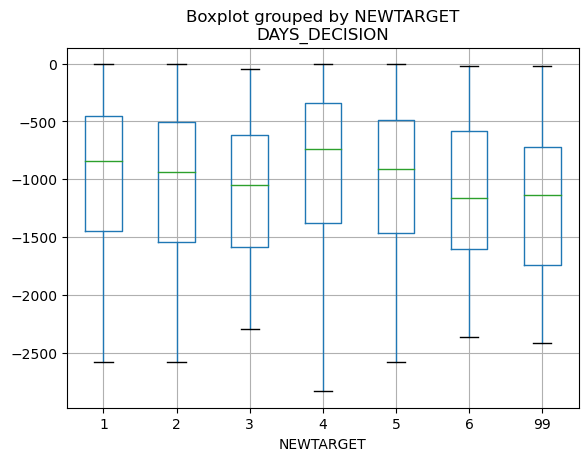

In [63]:
merged2.boxplot("DAYS_DECISION", by="NEWTARGET")

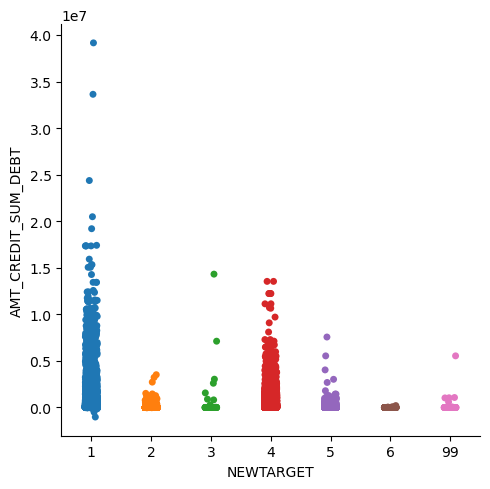

In [64]:
sns.catplot(x="NEWTARGET", y="AMT_CREDIT_SUM_DEBT", data=merged2)

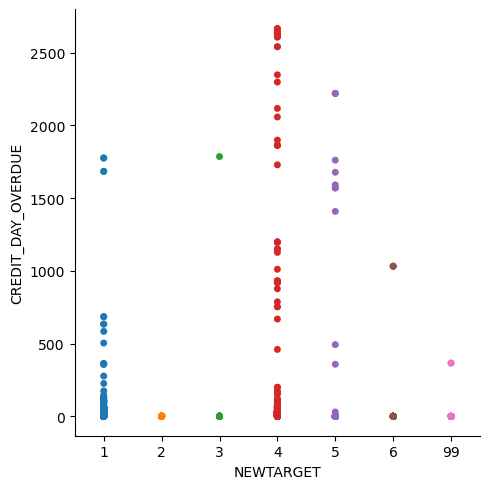

In [65]:
sns.catplot(x="NEWTARGET", y="CREDIT_DAY_OVERDUE", jitter=False, data=merged2)

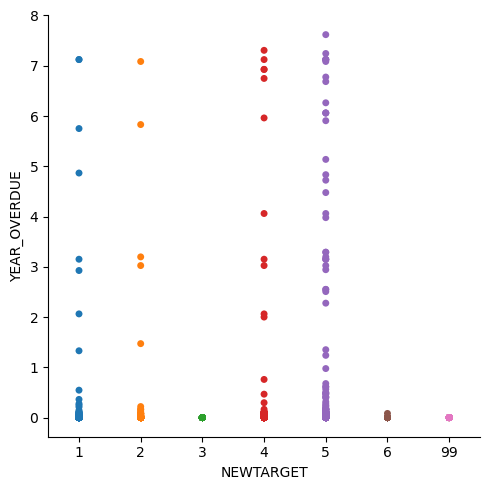

In [66]:
sns.catplot(x="NEWTARGET", y="YEAR_OVERDUE", jitter=False, data=merged2)

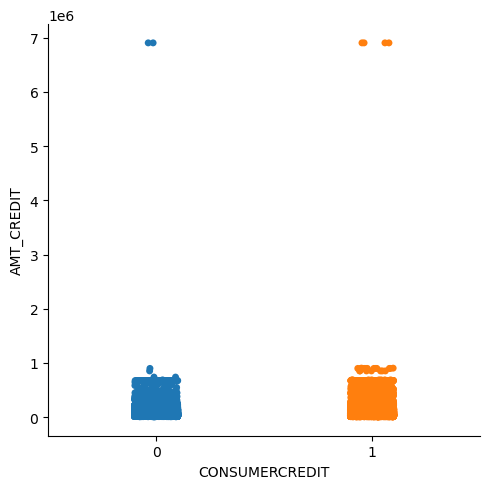

In [67]:
sns.catplot(x="CONSUMERCREDIT", y="AMT_CREDIT", data=merged2)

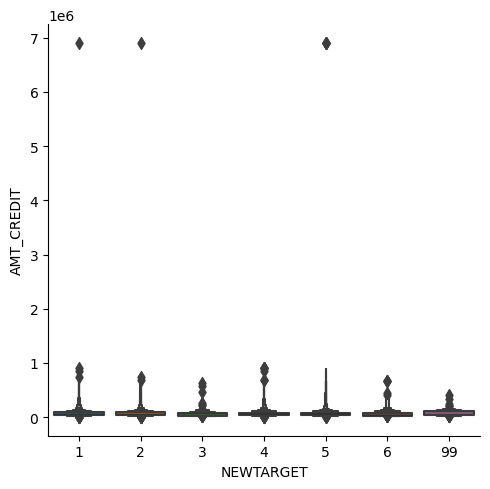

In [68]:
sns.catplot(x="NEWTARGET", y="AMT_CREDIT", kind="boxen",
            data=merged2)

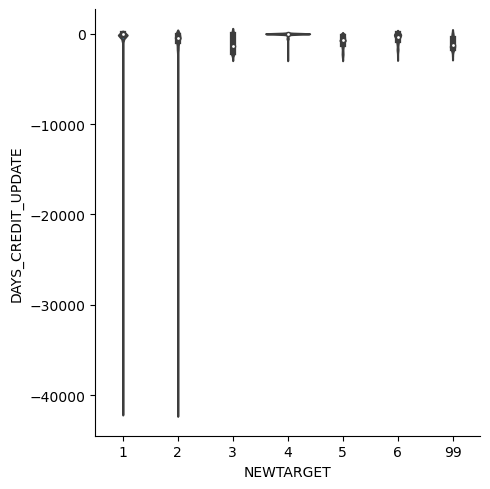

In [69]:
sns.catplot(x="NEWTARGET", y="DAYS_CREDIT_UPDATE", 
            kind="violin", data=merged2)

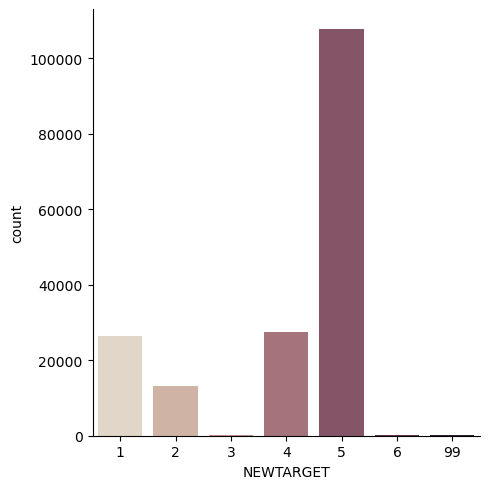

In [70]:
sns.catplot(x="NEWTARGET", kind="count", palette="ch:.25", data=merged2)

In [71]:
merged2.loc[merged2['NEWTARGET']<=3]

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_YIELD_GROUP,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,bureau_acct_cnt,freq,Years_Credit,MONTH_OVERDUE,YEAR_OVERDUE,CONSUMERCREDIT,NEWTARGET
178,1371941.00,100028,Consumer loans,NaN,49315.50,49315.50,Unused offer,-998.00,Cash through the bank,CLIENT,Repeater,XNA,6356880.00,Active,currency 1,-1805.00,0.00,0.00,0.00,0.00,0.00,0.00,Credit card,-54.00,17,8,-4.95,0.00,0.00,0,1
179,1371941.00,100028,Consumer loans,NaN,49315.50,49315.50,Unused offer,-998.00,Cash through the bank,CLIENT,Repeater,XNA,6356884.00,Active,currency 1,-307.00,0.00,0.00,180000.00,151015.50,0.00,0.00,Credit card,-141.00,17,9,-0.84,0.00,0.00,0,1
181,1371941.00,100028,Consumer loans,NaN,49315.50,49315.50,Unused offer,-998.00,Cash through the bank,CLIENT,Repeater,XNA,6356890.00,Closed,currency 1,-1102.00,0.00,0.00,105750.00,0.00,0.00,0.00,Credit card,-682.00,17,11,-3.02,0.00,0.00,0,2
198,2197792.00,100030,Consumer loans,NaN,33250.50,33250.50,Refused,-1788.00,Cash through the bank,LIMIT,Refreshed,XNA,6584419.00,Closed,currency 1,-1547.00,0.00,0.00,0.00,0.00,0.00,0.00,Credit card,-363.00,24,3,-4.24,0.00,0.00,0,2
200,2197792.00,100030,Consumer loans,NaN,33250.50,33250.50,Refused,-1788.00,Cash through the bank,LIMIT,Refreshed,XNA,6584421.00,Active,currency 1,-1053.00,0.00,0.00,45000.00,19341.00,25656.03,0.00,Credit card,-9.00,24,5,-2.88,0.00,0.00,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3764896,1913408.00,456210,Consumer loans,NaN,70164.00,70164.00,Unused offer,-656.00,Cash through the bank,CLIENT,Repeater,XNA,6171472.00,Active,currency 1,-18.00,0.00,0.00,85583.61,85583.61,0.00,0.00,Credit card,-15.00,12,17,-0.05,0.00,0.00,0,1
3765006,1632455.00,456220,Consumer loans,NaN,36135.00,36135.00,Unused offer,-1593.00,Cash through the bank,CLIENT,Repeater,XNA,5015731.00,Active,currency 1,-651.00,0.00,2.00,202500.00,29846.56,172653.43,0.00,Credit card,-7.00,10,5,-1.78,0.00,0.00,0,1
3765087,2219035.00,456230,Consumer loans,NaN,233698.14,233698.14,Unused offer,-2294.00,Cash through the bank,CLIENT,Repeater,XNA,5999939.00,Closed,currency 1,-1989.00,0.00,0.00,88650.00,0.00,0.00,0.00,Credit card,-353.00,17,7,-5.45,0.00,0.00,0,2
3765092,1579482.00,456230,Consumer loans,NaN,233698.14,233698.14,Unused offer,-2294.00,Cash through the bank,CLIENT,Repeater,XNA,5999939.00,Closed,currency 1,-1989.00,0.00,0.00,88650.00,0.00,0.00,0.00,Credit card,-353.00,17,12,-5.45,0.00,0.00,0,2


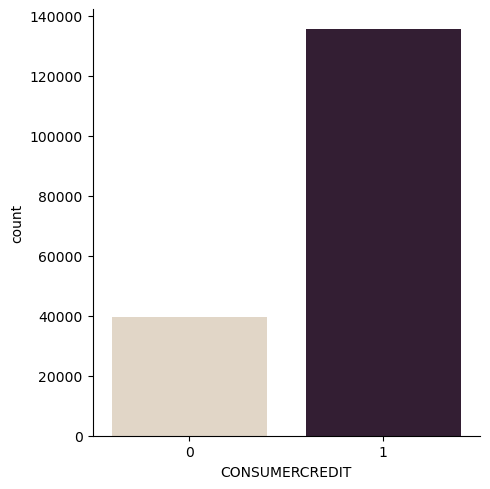

In [72]:
sns.catplot(x="CONSUMERCREDIT", kind="count", palette="ch:.25", data=merged2)

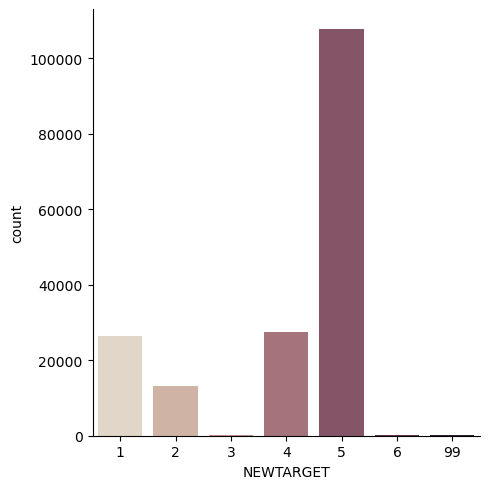

In [73]:
sns.catplot(x="NEWTARGET", kind="count", palette="ch:.25", data=merged2)

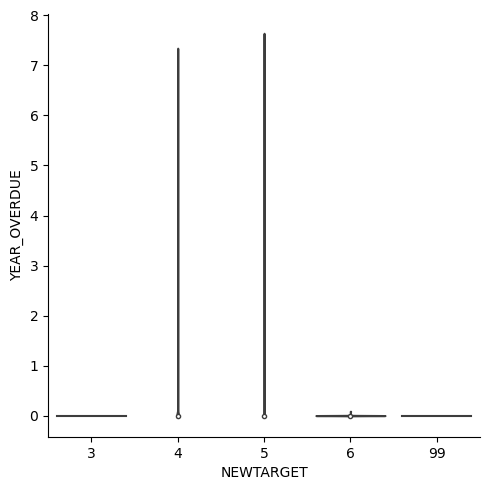

In [78]:
sns.catplot(x="NEWTARGET", y="YEAR_OVERDUE", 
            kind="violin", data=merged2.loc[merged2['NEWTARGET']>=3])

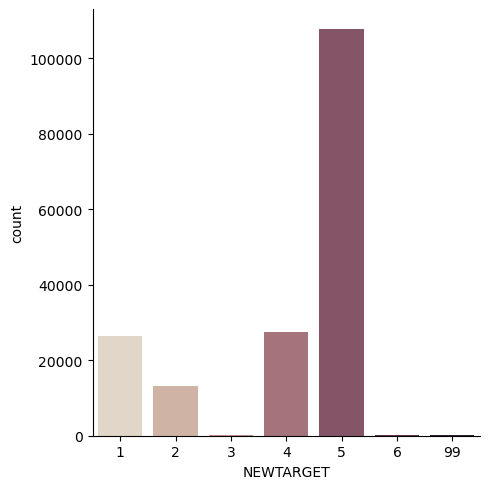

In [79]:
sns.catplot(x="NEWTARGET", kind="count", palette="ch:.25", data=merged2)

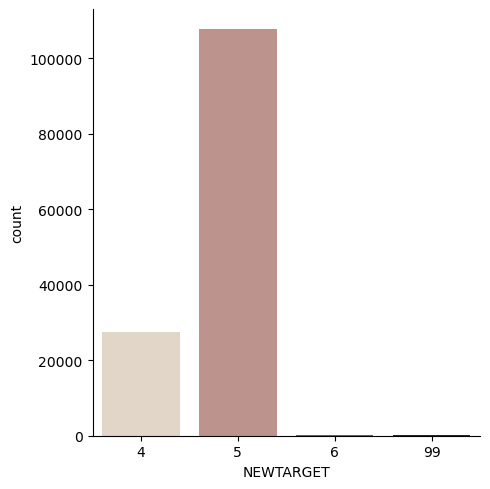

In [80]:
sns.catplot(x="NEWTARGET", kind="count", palette="ch:.25", data=merged2.loc[merged2['NEWTARGET']>3])

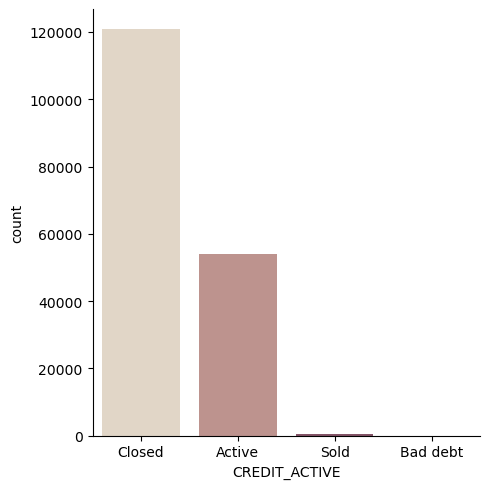

In [81]:
sns.catplot(x="CREDIT_ACTIVE", kind="count", palette="ch:.25", data=merged2)

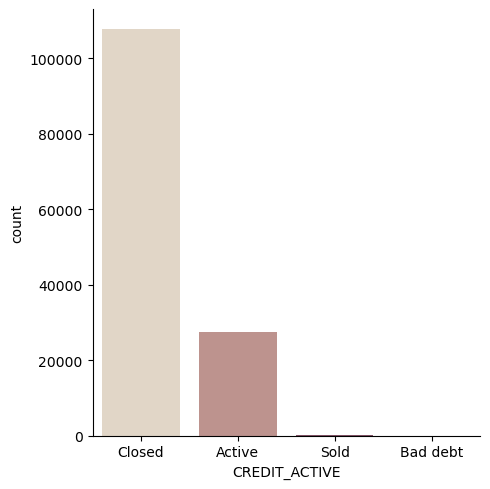

In [82]:
sns.catplot(x="CREDIT_ACTIVE", kind="count", palette="ch:.25", data=merged2.loc[merged2['NEWTARGET']>3])

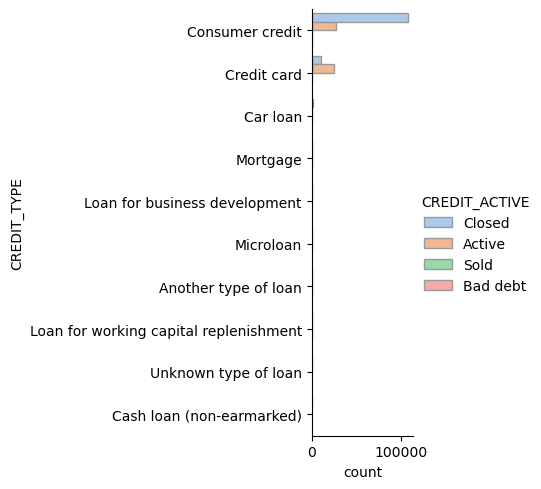

In [83]:
sns.catplot(y="CREDIT_TYPE", hue="CREDIT_ACTIVE", kind="count",
            palette="pastel", edgecolor=".6",
            data=merged2)

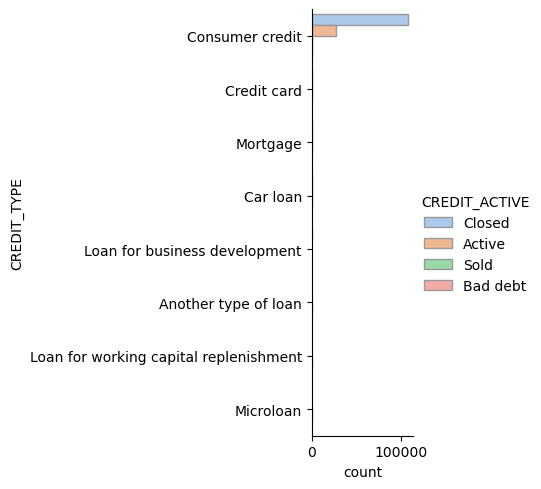

In [84]:
sns.catplot(y="CREDIT_TYPE", hue="CREDIT_ACTIVE", kind="count",
            palette="pastel", edgecolor=".6",
            data=merged2.loc[merged2['NEWTARGET']>=3])

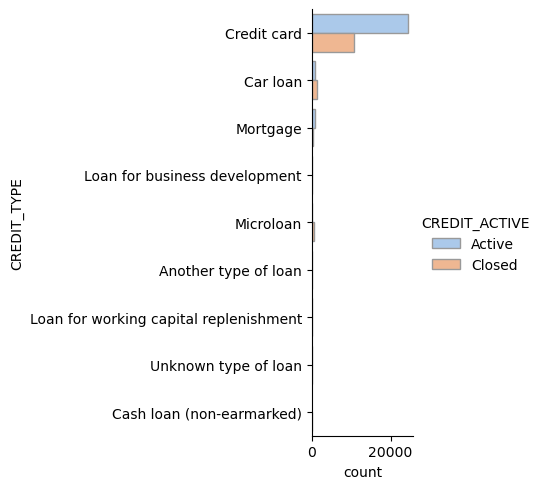

In [85]:
sns.catplot(y="CREDIT_TYPE", hue="CREDIT_ACTIVE", kind="count",
            palette="pastel", edgecolor=".6",
            data=merged2.loc[merged2['NEWTARGET']<3])

<AxesSubplot:xlabel='count', ylabel='CREDIT_TYPE'>

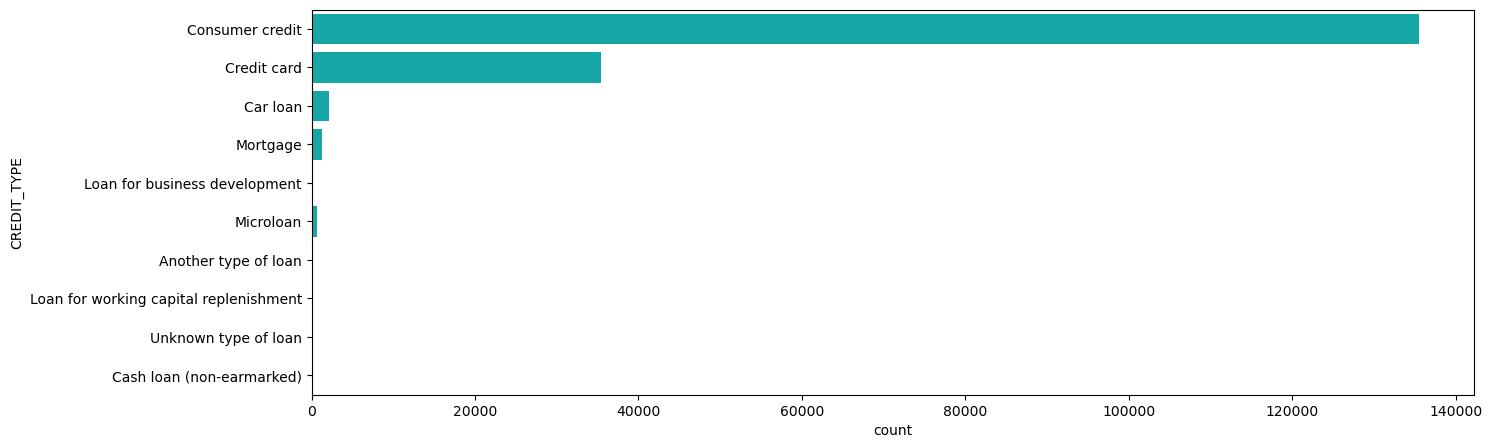

In [86]:
f, ax = pyplt.subplots(figsize=(15, 5))
sns.countplot(y="CREDIT_TYPE", data=merged2, color="c")

<AxesSubplot:xlabel='count', ylabel='CREDIT_TYPE'>

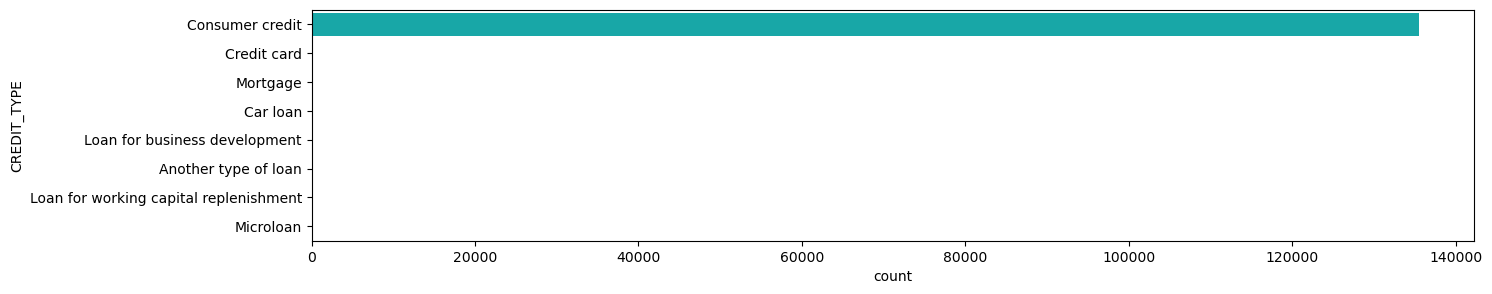

In [87]:
f, ax = pyplt.subplots(figsize=(15, 3))
sns.countplot(y="CREDIT_TYPE", data=merged2.loc[merged2['NEWTARGET']>=3], color="c")

<AxesSubplot:xlabel='count', ylabel='CREDIT_TYPE'>

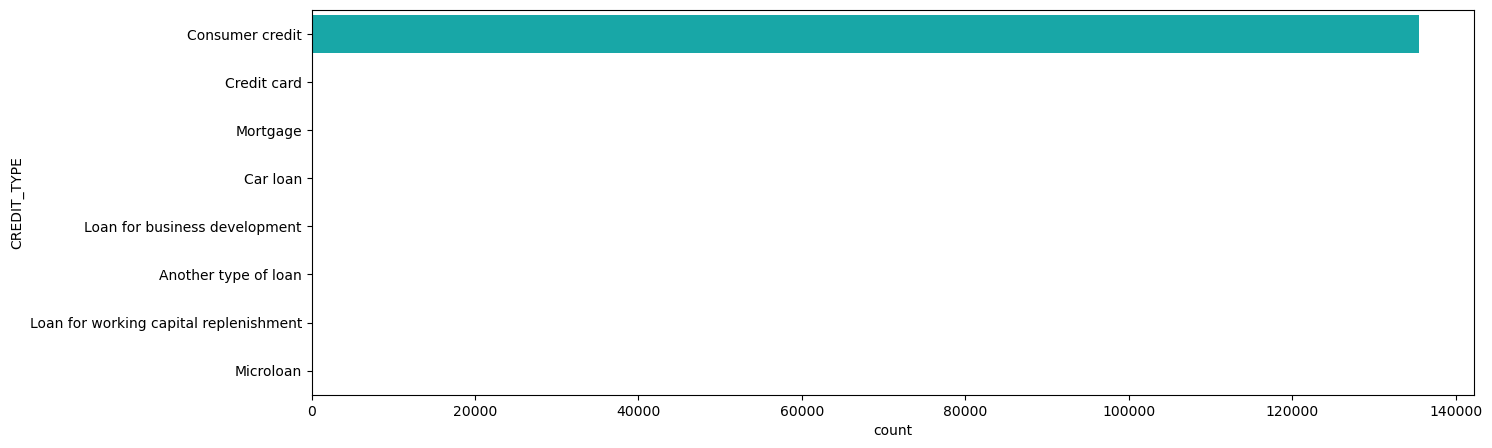

In [88]:
f, ax = pyplt.subplots(figsize=(15, 5))
sns.countplot(y="CREDIT_TYPE", data=merged2.loc[merged2['NEWTARGET']>=3], color="c")

<AxesSubplot:xlabel='count', ylabel='CREDIT_TYPE'>

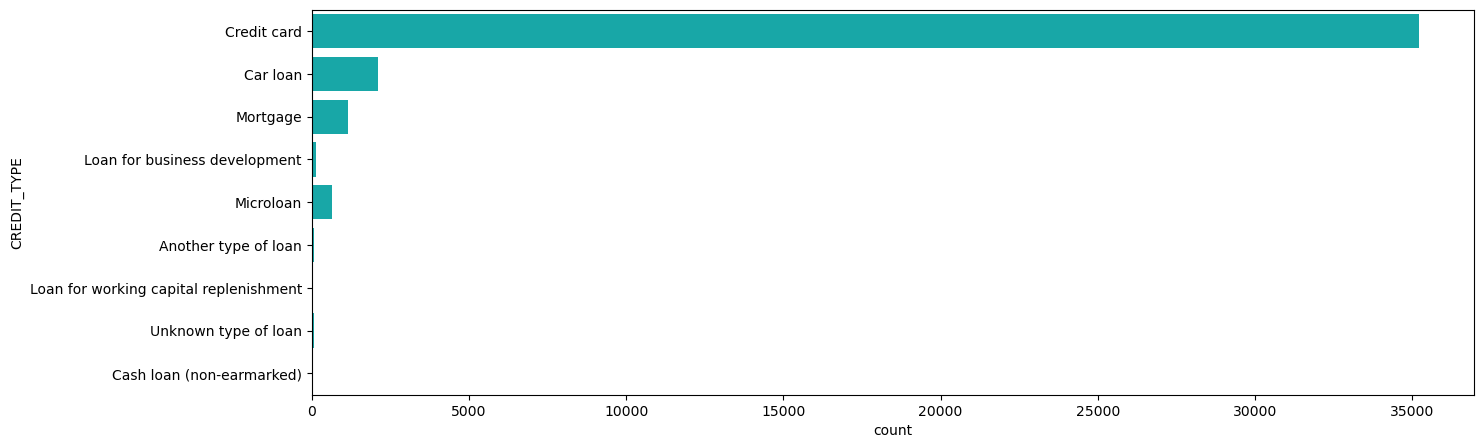

In [89]:
f, ax = pyplt.subplots(figsize=(15, 5))
sns.countplot(y="CREDIT_TYPE", data=merged2.loc[merged2['NEWTARGET']<3], color="c")

<AxesSubplot:xlabel='count', ylabel='CREDIT_ACTIVE'>

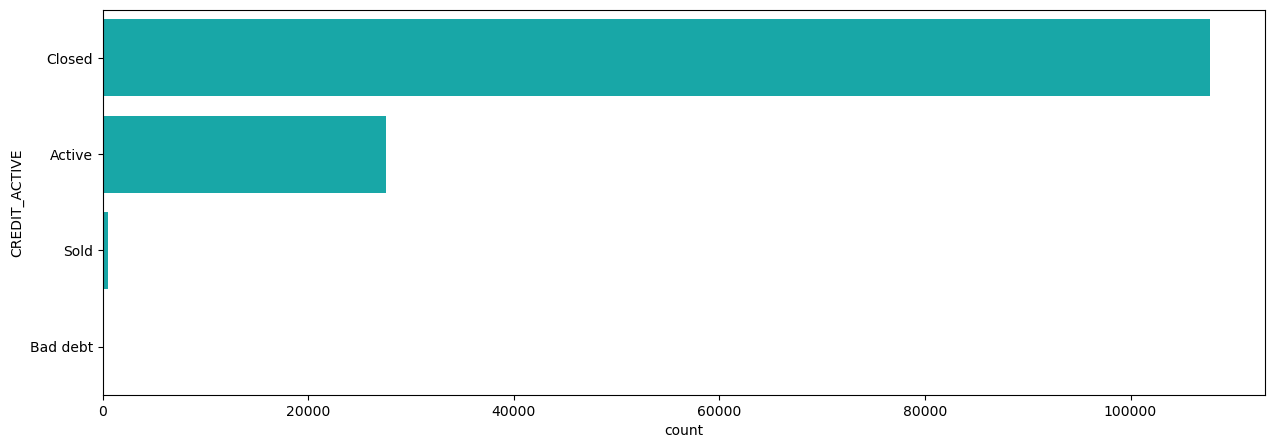

In [90]:
f, ax = pyplt.subplots(figsize=(15, 5))
sns.countplot(y="CREDIT_ACTIVE", data=merged2.loc[merged2['NEWTARGET']>=3], color="c")

In [91]:
def fin_bin(merged2):
    if (merged2['AMT_CREDIT_SUM']<3.549946e+05) : return 1
    elif (merged2['AMT_CREDIT_SUM']==3.549946e+05) : return 2
    elif (merged2['AMT_CREDIT_SUM']>3.549946e+05) : return 3
    else: return 4
merged2['acs_bin'] = merged2.apply(fin_bin, axis = 1)

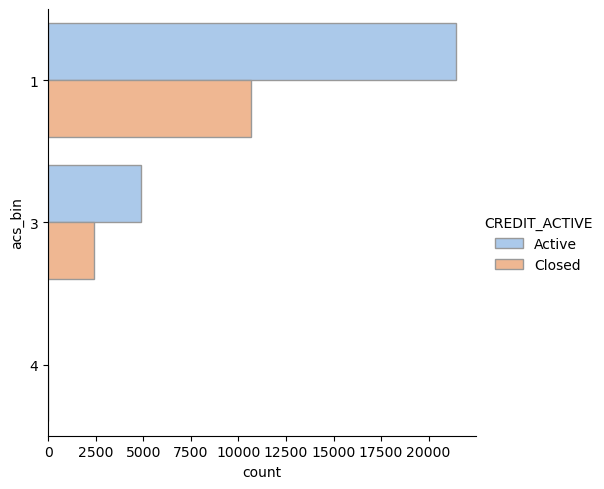

In [92]:
sns.catplot(y="acs_bin", hue="CREDIT_ACTIVE", kind="count",
            palette="pastel", edgecolor=".6",
            data=merged2.loc[merged2['NEWTARGET']<3])

In [93]:
def someplot(merged2):
    f, ax = pyplt.subplots(figsize=(15, 5))
    (sns.countplot(y="CREDIT_TYPE", data=merged2, color="c"))
someplot  

<function __main__.someplot(merged2)>

In [94]:
corrp =merged2.drop(columns=['SK_ID_BUREAU','SK_ID_CURR']).groupby('CREDIT_ACTIVE').corr(method='pearson')
corrp

SK_ID_PREV  AMT_ANNUITY  \
CREDIT_ACTIVE                                                   
Active        SK_ID_PREV                    1.00        -0.24   
              AMT_ANNUITY                  -0.24         1.00   
              AMT_APPLICATION               0.00         0.77   
              AMT_CREDIT                    0.00         0.76   
              DAYS_DECISION                -0.02        -0.55   
              DAYS_CREDIT                  -0.01        -0.56   
              CREDIT_DAY_OVERDUE           -0.00          NaN   
              CNT_CREDIT_PROLONG           -0.00        -0.20   
              AMT_CREDIT_SUM                0.01         0.08   
              AMT_CREDIT_SUM_DEBT           0.01         0.77   
              AMT_CREDIT_SUM_LIMIT          0.00        -0.22   
              AMT_CREDIT_SUM_OVERDUE        0.00          NaN   
              DAYS_CREDIT_UPDATE           -0.01        -0.52   
              bureau_acct_cnt              -0.00        -0.52   
              freq                          0.00        -0.40   
              Years_Credit                 -0.01        -0.56   
              MONTH_OVERDUE                -0.00          NaN   
              YEAR_OVERDUE                  0.01          NaN   
              CONSUMERCREDIT               -0.01         0.53   
              NEWTARGET                    -0.01         0.53   
              acs_bin                       0.01         0.35   
Bad debt      SK_ID_PREV                    1.00          NaN   
              AMT_ANNUITY                    NaN          NaN   
              AMT_APPLICATION               1.00          NaN   
              AMT_CREDIT                    1.00          NaN   
              DAYS_DECISION                 1.00          NaN   
              DAYS_CREDIT                  -1.00          NaN   
              CREDIT_DAY_OVERDUE             NaN          NaN   
              CNT_CREDIT_PROLONG             NaN          NaN   
              AMT_CREDIT_SUM                1.00          NaN   
              AMT_CREDIT_SUM_DEBT            NaN          NaN   
              AMT_CREDIT_SUM_LIMIT           NaN          NaN   
              AMT_CREDIT_SUM_OVERDUE        1.00          NaN   
              DAYS_CREDIT_UPDATE            1.00          NaN   
              bureau_acct_cnt               1.00          NaN   
              freq                          1.00          NaN   
              Years_Credit                 -1.00          NaN   
              MONTH_OVERDUE                  NaN          NaN   
              YEAR_OVERDUE                   NaN          NaN   
              CONSUMERCREDIT                 NaN          NaN   
              NEWTARGET                      NaN          NaN   
              acs_bin                        NaN          NaN   
Closed        SK_ID_PREV                    1.00        -0.43   
              AMT_ANNUITY                  -0.43         1.00   
              AMT_APPLICATION              -0.00         1.00   
              AMT_CREDIT                   -0.00         1.00   
              DAYS_DECISION                -0.02        -0.12   
              DAYS_CREDIT                  -0.00        -0.11   
              CREDIT_DAY_OVERDUE            0.00          NaN   
              CNT_CREDIT_PROLONG            0.00          NaN   
              AMT_CREDIT_SUM               -0.00        -0.08   
              AMT_CREDIT_SUM_DEBT          -0.00          NaN   
              AMT_CREDIT_SUM_LIMIT          0.00          NaN   
              AMT_CREDIT_SUM_OVERDUE        0.00          NaN   
              DAYS_CREDIT_UPDATE           -0.00        -0.25   
              bureau_acct_cnt               0.01        -0.24   
              freq                          0.01        -0.18   
              Years_Credit                 -0.00        -0.11   
              MONTH_OVERDUE                 0.00          NaN   
              YEAR_OVERDUE                  0.00          NaN   
        

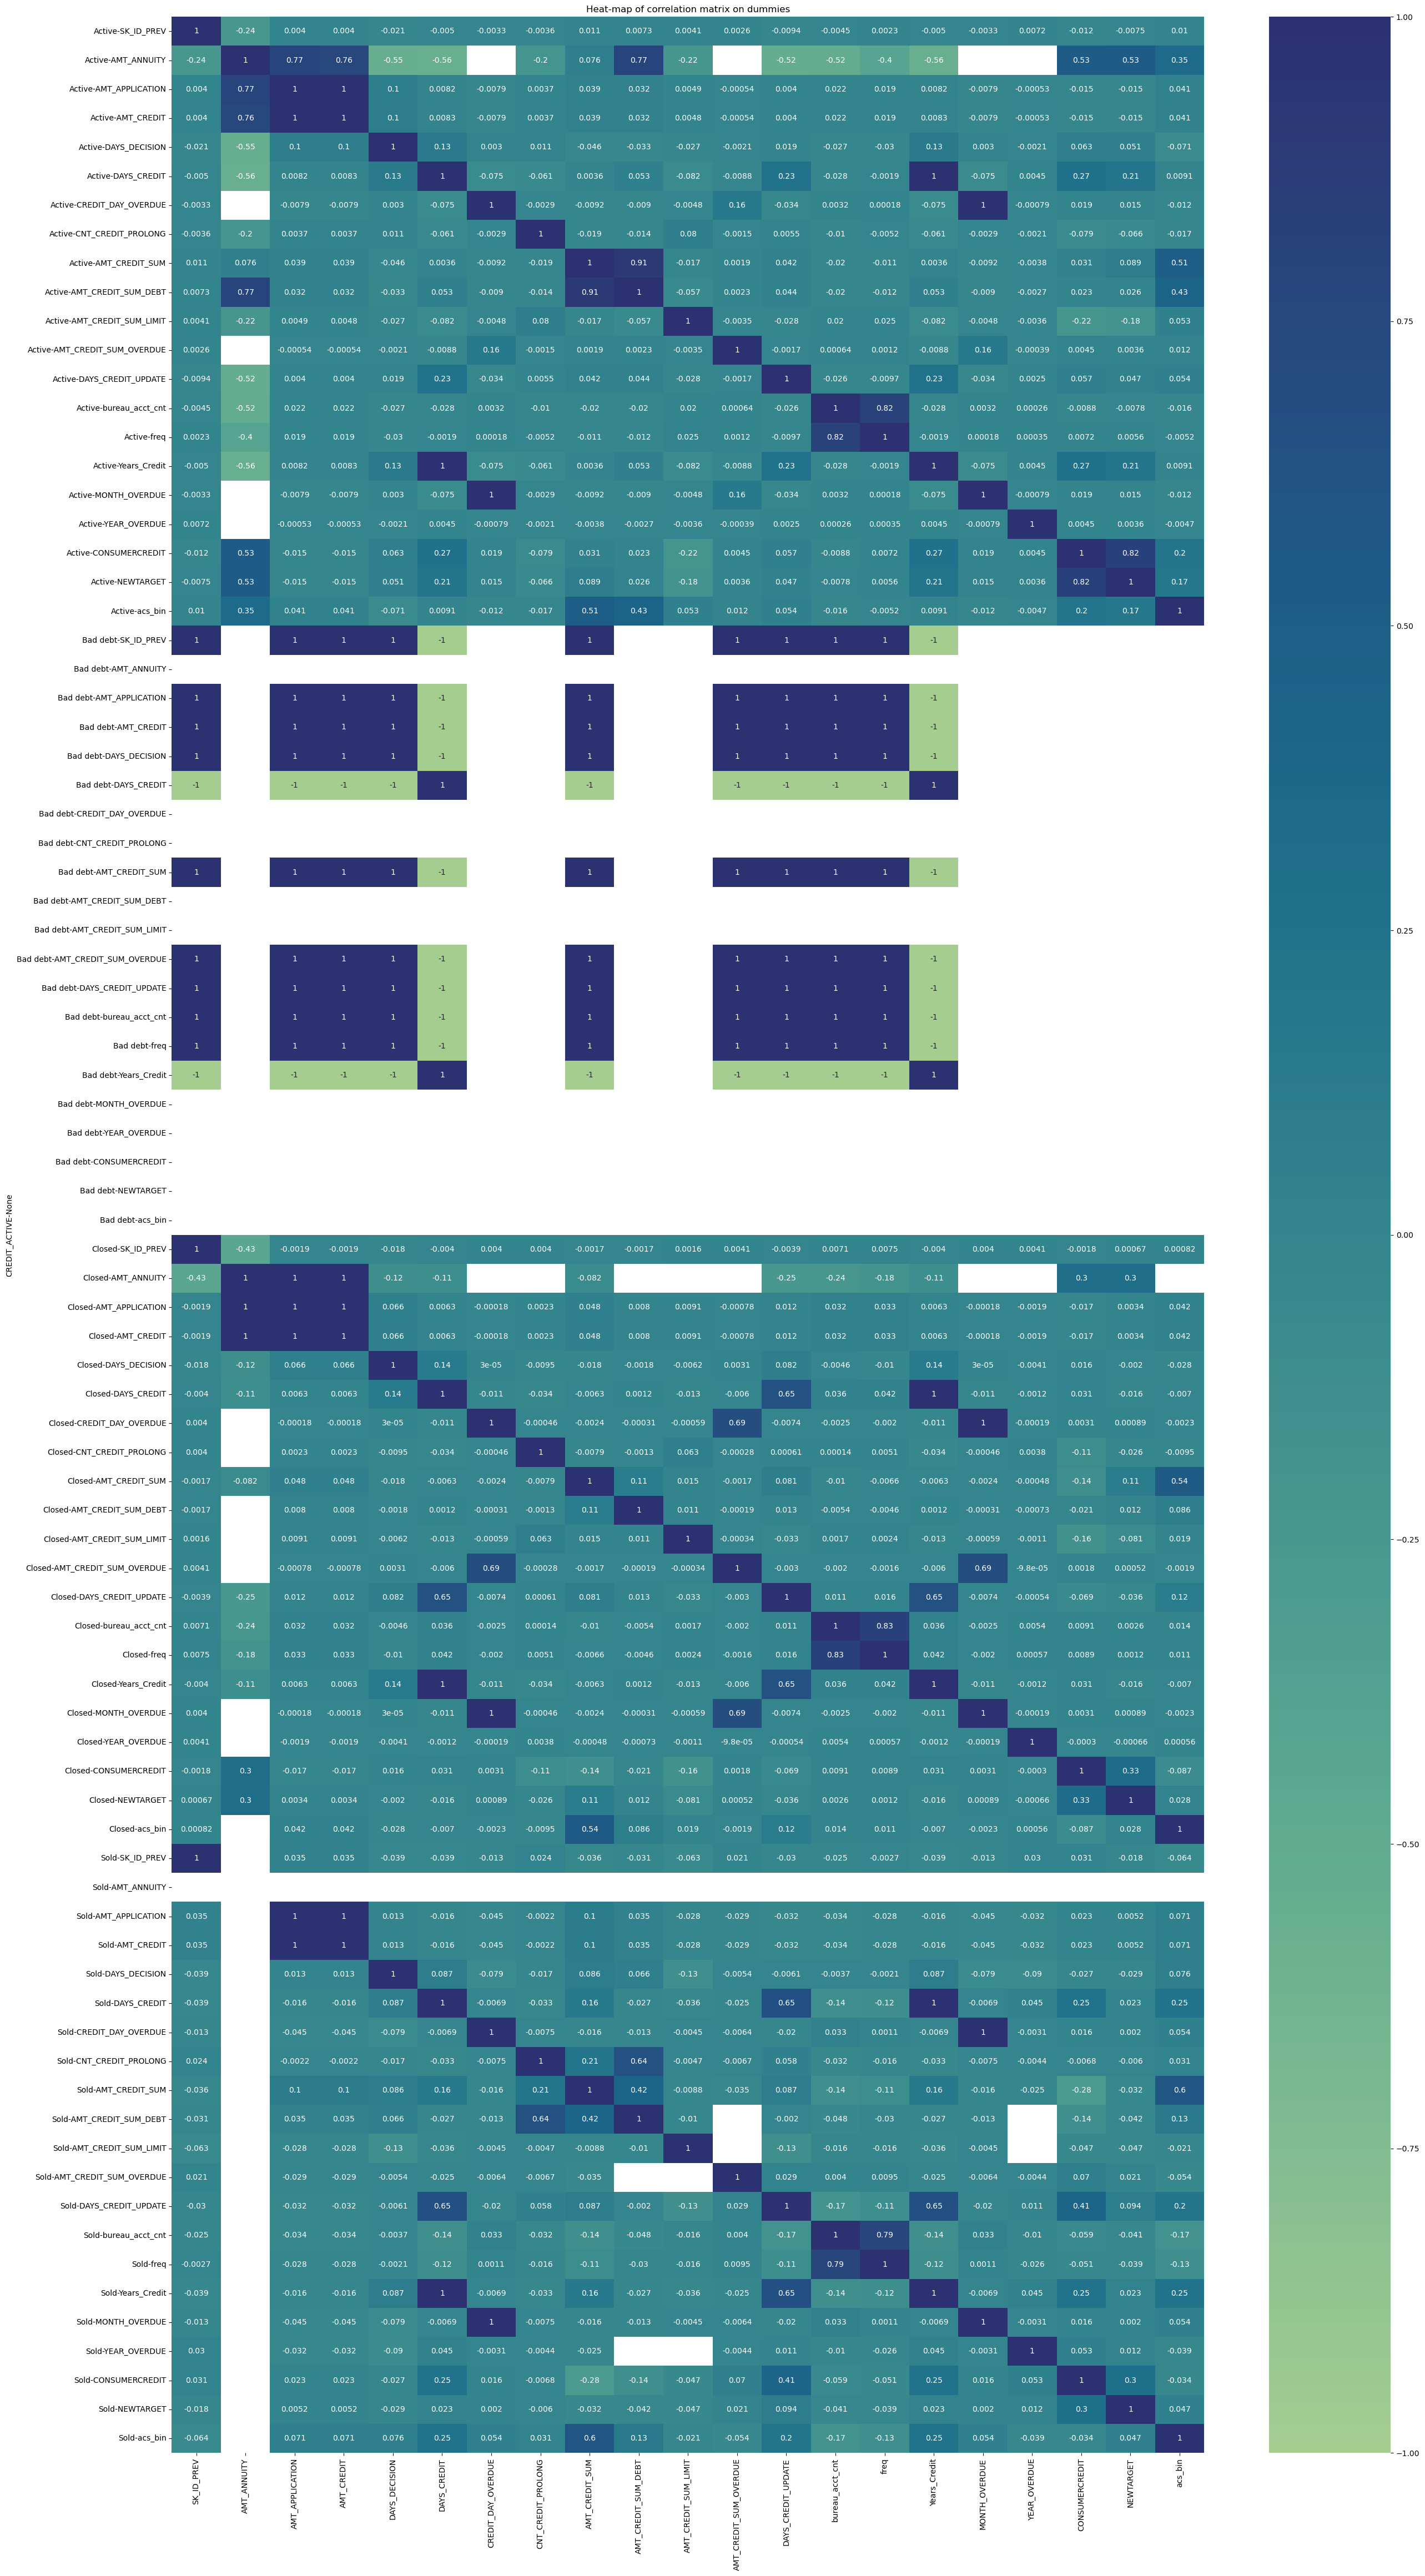

In [95]:
f, ax = pyplt.subplots(figsize=(30,57))
sns.heatmap(corrp, annot= True, cmap="crest")
ax.set_title('Heat-map of correlation matrix on dummies')
pyplt.savefig('correlation1.png')
pyplt.show()